In [1]:
from tensorflow import keras

In [2]:
model = keras.models.load_model('best-lstm-model.h5')

In [3]:
# 필요한 데이터 로드
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [4]:
(x_train_raw,y_train_raw),(x_test_raw,y_test_raw) =  imdb.load_data(num_words=500)
x_train,x_test,y_train,y_test =  train_test_split(x_train_raw,y_train_raw)

In [6]:
# pad sequence를 통해 데이터의 길이를 맞춰준다
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train_pad =  pad_sequences(x_train, maxlen=100)
x_test_pad =  pad_sequences(x_test, maxlen=100)

In [7]:
# 순환층에 드랍아웃을 적용

In [8]:
model2 =  keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [9]:
rmsprop =  keras.optimizers.RMSprop(learning_rate=1e-4)  # 0.0001
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(x_train_pad,y_train,epochs=100, batch_size=64, 
                     validation_data=(x_test_pad,y_test),
                     callbacks=[checkpoint_cb,early_stopping_cb]
                    )

Epoch 1/100
293/293 [==============================] - 9s 24ms/step - loss: 0.6921 - accuracy: 0.5262 - val_loss: 0.6910 - val_accuracy: 0.5619
Epoch 2/100
293/293 [==============================] - 7s 24ms/step - loss: 0.6885 - accuracy: 0.6018 - val_loss: 0.6862 - val_accuracy: 0.6115
Epoch 3/100
293/293 [==============================] - 7s 23ms/step - loss: 0.6800 - accuracy: 0.6446 - val_loss: 0.6730 - val_accuracy: 0.6550
Epoch 4/100
293/293 [==============================] - 7s 22ms/step - loss: 0.6455 - accuracy: 0.6920 - val_loss: 0.6044 - val_accuracy: 0.7053
Epoch 5/100
293/293 [==============================] - 9s 32ms/step - loss: 0.5665 - accuracy: 0.7238 - val_loss: 0.5534 - val_accuracy: 0.7322
Epoch 6/100
293/293 [==============================] - 7s 24ms/step - loss: 0.5380 - accuracy: 0.7449 - val_loss: 0.5306 - val_accuracy: 0.7478
Epoch 7/100
293/293 [==============================] - 7s 22ms/step - loss: 0.5176 - accuracy: 0.7606 - val_loss: 0.5133 - val_accuracy:

293/293 [==============================] - 7s 22ms/step - loss: 0.4062 - accuracy: 0.8130 - val_loss: 0.4284 - val_accuracy: 0.8003


In [10]:
import matplotlib.pyplot as plt

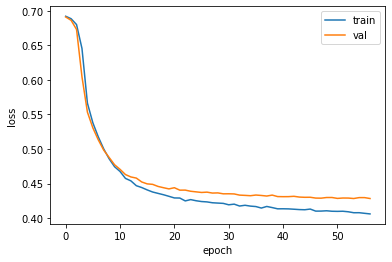

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [15]:
# 순환신경망 2개 연결하기
model3 =  keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

In [17]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [18]:
rmsprop =  keras.optimizers.RMSprop(learning_rate=1e-4)  # 0.0001
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2lstmdropout-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(x_train_pad,y_train,epochs=100, batch_size=64, 
                     validation_data=(x_test_pad,y_test),
                     callbacks=[checkpoint_cb,early_stopping_cb]
                    )

Epoch 1/100
293/293 [==============================] - 17s 44ms/step - loss: 0.6930 - accuracy: 0.5086 - val_loss: 0.6926 - val_accuracy: 0.5760
Epoch 2/100
293/293 [==============================] - 13s 45ms/step - loss: 0.6918 - accuracy: 0.5735 - val_loss: 0.6903 - val_accuracy: 0.6264
Epoch 3/100
293/293 [==============================] - 12s 42ms/step - loss: 0.6845 - accuracy: 0.6331 - val_loss: 0.6728 - val_accuracy: 0.6235
Epoch 4/100
293/293 [==============================] - 13s 43ms/step - loss: 0.6324 - accuracy: 0.6661 - val_loss: 0.6038 - val_accuracy: 0.7107
Epoch 5/100
293/293 [==============================] - 12s 42ms/step - loss: 0.5855 - accuracy: 0.7225 - val_loss: 0.5714 - val_accuracy: 0.7261
Epoch 6/100
293/293 [==============================] - 12s 42ms/step - loss: 0.5560 - accuracy: 0.7350 - val_loss: 0.5454 - val_accuracy: 0.7440
Epoch 7/100
293/293 [==============================] - 12s 42ms/step - loss: 0.5299 - accuracy: 0.7464 - val_loss: 0.5239 - val_ac

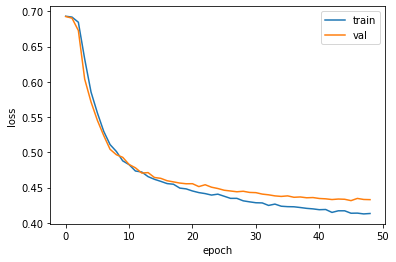

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [20]:
# GRU신경망  gated recurrent unit 

In [28]:
model4 =  keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))
model4.summary()           

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop =  keras.optimizers.RMSprop(learning_rate=1e-4)  # 0.0001
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2lstmdropout-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(x_train_pad,y_train,epochs=100, batch_size=64, 
                     validation_data=(x_test_pad,y_test),
                     callbacks=[checkpoint_cb,early_stopping_cb]
                    )

Epoch 1/100
293/293 [==============================] - 9s 25ms/step - loss: 0.6920 - accuracy: 0.5397 - val_loss: 0.6910 - val_accuracy: 0.5730
Epoch 2/100
293/293 [==============================] - 7s 23ms/step - loss: 0.6900 - accuracy: 0.5759 - val_loss: 0.6887 - val_accuracy: 0.5858
Epoch 3/100
293/293 [==============================] - 7s 26ms/step - loss: 0.6868 - accuracy: 0.5962 - val_loss: 0.6849 - val_accuracy: 0.6051
Epoch 4/100
293/293 [==============================] - 7s 25ms/step - loss: 0.6817 - accuracy: 0.6125 - val_loss: 0.6791 - val_accuracy: 0.6134
Epoch 5/100
293/293 [==============================] - 7s 24ms/step - loss: 0.6740 - accuracy: 0.6234 - val_loss: 0.6710 - val_accuracy: 0.6176
Epoch 6/100
293/293 [==============================] - 7s 24ms/step - loss: 0.6627 - accuracy: 0.6416 - val_loss: 0.6583 - val_accuracy: 0.6341
Epoch 7/100
293/293 [==============================] - 7s 24ms/step - loss: 0.6457 - accuracy: 0.6564 - val_loss: 0.6394 - val_accuracy: